In [36]:
%matplotlib inline
import torch
import pickle
import matplotlib.pyplot as plt

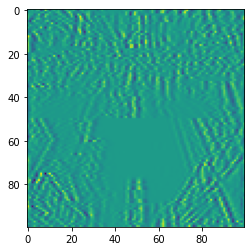

In [37]:
img = pickle.load(open("broken_image_t.p", "rb"), encoding="latin1")
img_tensor = torch.FloatTensor(img)

plt.imshow(img_tensor.view(100, 100))

In [44]:
def weird_function(x, n_iter=5):
    h = x
    filt = torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor = torch.tensor([1.0 * 0])
        h_l = torch.cat((zero_tensor, h[:-1]), 0)
        h_r = torch.cat((h[1:], zero_tensor), 0)
        h = filt[0] * h + filt[2] * h_l + filt[1] * h_r
        if i % 2 == 0:
            h = torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]), 0)
    return h
        

In [45]:
def distance_loss(hypothesis, broken_image):
    return torch.dist(hypothesis, broken_image)


In [46]:
random_tensor = torch.randn(100 * 100, dtype=torch.float)

In [47]:
lr = 0.8
num_repeat = 20000

In [48]:
for i in range(num_repeat):
    random_tensor.requires_grad_(True)
    hypothesis = weird_function(random_tensor)
    loss = distance_loss(hypothesis, img_tensor)
    loss.backward()
    
    with torch.no_grad():
        random_tensor = random_tensor - lr * random_tensor.grad
    if i % 1000 == 0:
        print(f"Loss at {i} = {loss.item()}")

Loss at 0 = 12.230748176574707
Loss at 1000 = 1.1236242055892944
Loss at 2000 = 0.5355504155158997
Loss at 3000 = 0.3720302879810333
Loss at 4000 = 0.29541847109794617
Loss at 5000 = 0.24830204248428345
Loss at 6000 = 0.21409675478935242
Loss at 7000 = 0.18660539388656616
Loss at 8000 = 0.16312207281589508
Loss at 9000 = 0.14228147268295288
Loss at 10000 = 0.12329369783401489
Loss at 11000 = 0.1056496873497963
Loss at 12000 = 0.08899787068367004
Loss at 13000 = 0.07308768481016159
Loss at 14000 = 0.05774007365107536
Loss at 15000 = 0.04282809793949127
Loss at 16000 = 0.028264695778489113
Loss at 17000 = 0.02115570940077305
Loss at 18000 = 0.021165482699871063
Loss at 19000 = 0.02116713486611843


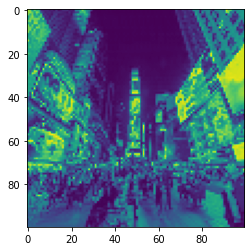

In [49]:
plt.imshow(random_tensor.view(100, 100).data)